-----

# MNist

[ Kaggle - MNIST 대회 링크 ](https://www.kaggle.com/c/digit-recognizer)

---

# Dacon 제출용

## 라이브러리 호출

In [80]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd

---
## 데이터셋 불러오기 

* tensorflow keras 라이브러리에 있는 mnist 데이터 사용

In [45]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print("Train Dataset Shape : ",x_train.shape)
print("Test Dataset Shape : ", x_test.shape)

Train Dataset Shape :  (60000, 28, 28)
Test Dataset Shape :  (10000, 28, 28)


---
## 데이터 전처리

1. train 데이터와 test 데이터 모두 학습시키기 위해 reshape
2. 정규화를 통해 오버피팅 방지 

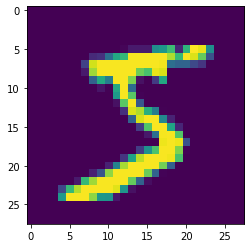

5


In [46]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [47]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train, x_test = x_train / 255.0,  x_test / 255.0

---
## 모델 생성

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

---
## 모델 컴파일 및 학습

In [49]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 298us/sample - loss: 0.1507 - accuracy: 0.9535
Epoch 2/5
60000/60000 [==============================] - 17s 284us/sample - loss: 0.0476 - accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0356 - accuracy: 0.9888
Epoch 4/5
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0257 - accuracy: 0.9921
Epoch 5/5
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0222 - accuracy: 0.9930


---
## 모델 평가

In [50]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(test_loss, test_accuracy)

10000/1 - 1s - loss: 0.0202 - accuracy: 0.9897
0.034722037371376066 0.9897


In [51]:
predict = model.predict([x_test])

## 제출 파일 생성

In [52]:
data = {'label':  np.argmax(predict, axis=1)}

In [54]:
submission = pd.DataFrame(data)
submission

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
submission.to_csv('E:\dnn\Mnist\mnist_pred.csv', index=True)

---
# Kaggle 용

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

In [26]:
train = pd.read_csv('./kaggle-dataset/train.csv')
test = pd.read_csv('./kaggle-dataset/test.csv')

In [27]:
y_train = train['label']
x_train = train.drop('label', axis=1)
del train

In [28]:
x_train = x_train / 255.0
test = test / 255.0

In [29]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [30]:
y_train = to_categorical(y_train, num_classes = 10)

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [33]:
model.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=5)

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 13s 301us/sample - loss: 0.0581 - accuracy: 0.9823
Epoch 2/5
42000/42000 [==============================] - 12s 287us/sample - loss: 0.0378 - accuracy: 0.9884
Epoch 3/5
42000/42000 [==============================] - 12s 289us/sample - loss: 0.0285 - accuracy: 0.9916
Epoch 4/5
42000/42000 [==============================] - 12s 289us/sample - loss: 0.0229 - accuracy: 0.9931
Epoch 5/5
42000/42000 [==============================] - 12s 295us/sample - loss: 0.0187 - accuracy: 0.9943


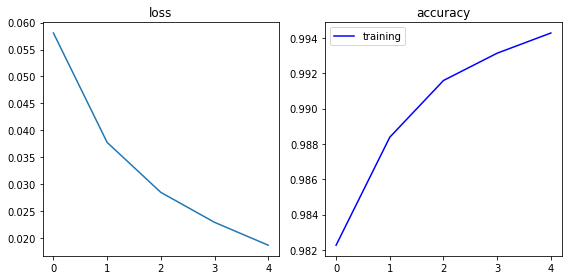

In [36]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
y_test = model.predict(test)
y_test = np.argmax(y_test, axis = 1)
y_test = pd.Series(submission, name="Label")
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_test], axis=1)
submission.to_csv("kaggle_summision.csv", index=False)